In [21]:
from Louvain_algo import Louvain_algo
import networkx as nx
import utils
import pickle

False

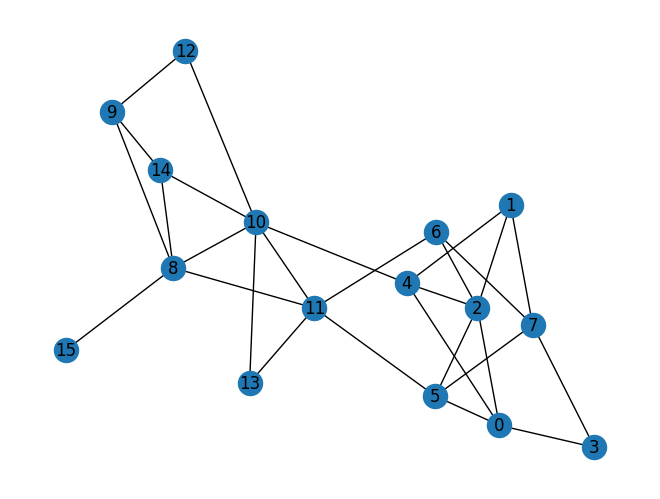

In [22]:
nodes = [(0,3),(1,7),(1,2),(1,4),(0,2),(0,4),(0,5),(2,4),(2,5),(2,6),(3,7),(5,7),(5,11),(6,7),(6,11),(8,11),(8,9),(8,10),(4,10),(8,14),(8,15),(9,14),(9,12),(10,11),(10,13),(10,12),(10,14),(11,13)]
G = nx.Graph()
G.add_edges_from(nodes)
nx.draw(G,with_labels=True)
G.has_edge(0,7)

In [35]:
len(G.edges)
algo = Louvain_algo(G,1)
communities = algo.run()


changes 10
changes 7
changes 0
before 0.34630102040816324
mod inside passage2 -0.09999999999999998
changes 2
len 2
mod change 0.0
Convergence reached. Stopping iterations.
after 0.39221938775510207
mod -0.09999999999999998
the number of communities is 2
what is better 4


In [36]:
print(len(communities))
communities

4


{7: {3, 6, 7}, 4: {0, 1, 2, 4, 5}, 12: {8, 9, 10, 12, 14, 15}, 13: {11, 13}}

In [37]:
communities = nx.community.louvain_communities(G)
communities

[{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15}]

In [50]:
communities = nx.community.louvain_communities(G,max_level=1)
print("after first passage",communities)
communities = nx.community.louvain_communities(G,max_level=2)
print("after second passage",communities)

after first passage [{0, 1, 2, 4, 5}, {3, 6, 7}, {11, 13}, {8, 9, 10, 12, 14, 15}]
after second passage [{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15}]


In [26]:
#nodes,edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
#G = utils.Create_Graph(nodes=nodes , edges=edges)

In [51]:
def email():
    graph = nx.read_edgelist("data/email-Eu-core.txt", nodetype = int)
    s = list(nx.connected_components(graph))
    G = graph.subgraph(s[0])
    return G
email_graph = email()

In [8]:
algo = Louvain_algo(email_graph,1)
communities = algo.run()

changes 955
changes 191
changes 22
changes 4
changes 1
changes 0
before 0.41741731167558505
mod inside passage2 -0.0026035502958579827
changes 8
len 8
mod change 0.0
Convergence reached. Stopping iterations.
after 0.4202653633903607
mod -0.0026035502958579827
the number of communities is 8
what is better 16


In [9]:
print(len(communities))
print(nx.community.modularity(email_graph,list(communities.values())))

16
0.41741731167558505


In [57]:
communities = nx.community.louvain_communities(email_graph,seed = 123)
print(len(communities))
print(nx.community.modularity(email_graph,communities))

communities = nx.community.louvain_communities(email_graph,max_level=1,seed=123)
print("after first passage",len(communities))
communities = nx.community.louvain_communities(email_graph,max_level=2,seed=123)
print("after second passage",len(communities))
communities = nx.community.louvain_communities(email_graph,max_level=3,seed=123)
print("after second passage",len(communities))

8
0.4308321076069302
after first passage 20
after second passage 8
after second passage 8


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[(1, 2), (1, 3), (2, 3), (3, 6), (3, 7), (3, 9), (4, 5), (4, 7), (4, 8), (5, 7), (5, 8), (6, 9), (7, 8), (8, 9)]


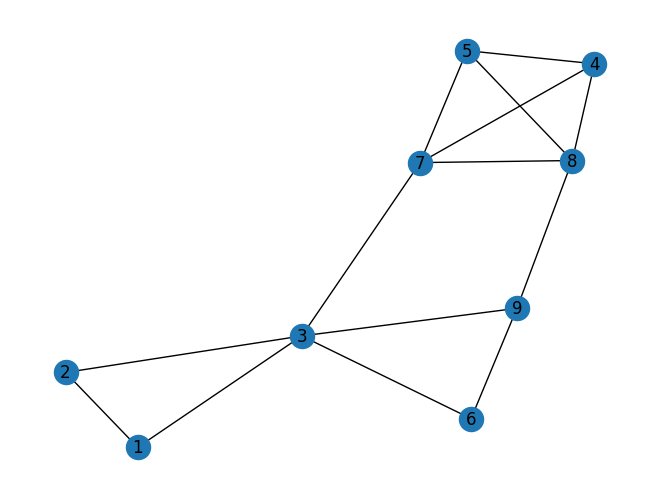

In [11]:
# Create a small graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([1,2, 3, 4, 5, 6, 7, 8, 9])

# Add edges
G.add_edges_from([(1,2),(1, 3),(2,3), (3,6),(3,7),(3,9),(4,5),(4,7),(4,8),(5,7),(5,8),(6,9),(7,8),(8,9)])

# Draw the graph
nx.draw(G, with_labels=True)
print(G.nodes)
print(G.edges)


In [12]:
%%time
algo = Louvain_algo(G,1)
communities = algo.run()

changes 6
changes 0
before 0.32908163265306123
mod inside passage2 -0.2222222222222222
changes 1
len 2
mod change 0.0
Convergence reached. Stopping iterations.
after 0.35714285714285715
mod -0.2222222222222222
the number of communities is 2
what is better 3
CPU times: user 971 µs, sys: 44 µs, total: 1.01 ms
Wall time: 1 ms


In [13]:
communities

{2: {1, 2, 3}, 5: {4, 5, 7, 8}, 9: {6, 9}}

In [58]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))
list(communities.values())

[{7, 264, 9, 265, 267, 266, 11, 8, 525, 12, 529, 530, 19, 804, 293, 805, 43, 44, 555, 558, 565, 566, 823, 569, 570, 827, 573, 830, 833, 324, 778, 332, 856, 602, 608, 358, 359, 360, 362, 365, 374, 893, 649, 141, 912, 913, 661, 406, 407, 666, 922, 672, 161, 674, 416, 421, 430, 951, 441, 699, 700, 957, 956, 707, 451, 452, 967, 498, 971, 972, 973, 975, 720, 466, 213, 729, 247, 739, 996, 487, 488, 496, 754, 499, 500, 501, 502, 503, 504, 505, 246, 506, 765, 510}, {515, 522, 523, 526, 14, 534, 542, 543, 544, 41, 556, 557, 562, 563, 51, 53, 567, 568, 572, 574, 576, 65, 64, 581, 584, 585, 593, 600, 94, 95, 611, 620, 623, 128, 129, 664, 677, 167, 168, 172, 688, 176, 689, 694, 183, 705, 706, 196, 197, 198, 199, 200, 201, 714, 203, 204, 205, 206, 207, 202, 712, 740, 232, 749, 751, 257, 776, 779, 270, 782, 275, 276, 789, 790, 791, 280, 289, 290, 291, 292, 802, 294, 801, 813, 817, 820, 822, 829, 835, 836, 840, 843, 848, 850, 870, 873, 874, 908, 909, 910, 399, 401, 403, 917, 918, 413, 419, 936, 425, 

AttributeError: 'list' object has no attribute 'values'

In [15]:
%%time
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
print(communities_built)

There are 2 communities.
0.35714285714285715
[{8, 4, 5, 7}, {1, 2, 3, 6, 9}]
CPU times: user 724 µs, sys: 33 µs, total: 757 µs
Wall time: 780 µs


In [59]:
graph = nx.read_edgelist("data/CA-GrQc.txt", nodetype = int)
N = nx.number_of_nodes(graph)
m = nx.number_of_edges(graph)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)
print("Is connected",nx.is_connected(graph))


The number of nodes in the graph is:  5242
The number of edges in the graph is: 14496
Is connected False


In [60]:
s = list(nx.connected_components(graph))
G = graph.subgraph(s[0])
N = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)

The number of nodes in the graph is:  4158
The number of edges in the graph is: 13428


In [61]:
algo = Louvain_algo(G,1)

In [19]:
%%time
communities = algo.run()

changes 3144
changes 776
changes 169
changes 27
changes 5
changes 0
before 0.6864614010853589
mod inside passage2 0.2911368620037811
changes 657
len 208
mod change 0.056263516068052855
mod inside passage2 0.34740037807183394
changes 110
len 202
mod change 0.009269943289225036
mod inside passage2 0.356670321361059
changes 16
len 200
mod change 0.0024820415879017177
mod inside passage2 0.3591523629489607
changes 4
len 200
mod change 1.7013232513907184e-06
mod inside passage2 0.3591540642722121
changes 1
len 200
mod change 0.0
Convergence reached. Stopping iterations.
after 0.8165766800133709
mod 0.3591540642722121
the number of communities is 200
before 0.3591540642722121
mod inside passage2 0.09691441775552484
changes 186
len 13
mod change -0.07749796701969956
Convergence reached. Stopping iterations.
after 0.057357844990548225
mod 0.01941645073582528
the number of communities is 13
what is better 200
from before {14982: {5233, 14550, 14982}, 19525: {3937, 19525, 16584, 17804, 7601, 142

In [20]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))



{14982: {13056, 10310, 14982, 5233, 24372, 14550, 1787, 1279}, 19525: {17156, 16261, 392, 17804, 3853, 16270, 8718, 15251, 20375, 17956, 3878, 23721, 7601, 2485, 14265, 18622, 22463, 19525, 16584, 11468, 10062, 11470, 20432, 3927, 3937, 5218, 3173, 16102, 21866, 5230, 18543, 12406}, 10351: {16258, 6667, 25628, 4125, 10912, 16676, 21927, 6825, 14123, 22836, 10805, 2239, 2752, 19783, 21705, 21194, 1356, 6626, 25069, 22894, 10351, 11638}, 26023: {4376, 5794, 26051, 260, 15301, 20934, 18246, 13026, 11401, 10601, 26023, 9712, 7025, 26100, 13205, 2710, 11640, 25209}, 24722: {24578, 13831, 6158, 8732, 12324, 16937, 1090, 15947, 15455, 23653, 21613, 23665, 7281, 11892, 4213, 124, 18052, 7307, 24722, 18067, 10898, 24219, 7324, 20645, 8870, 8876, 8365, 18094, 8367, 17075, 11444, 13493, 20663, 13496, 8888, 8376, 12472, 16589, 23758, 2255, 23256, 18141, 23264, 2789, 10990, 16128, 15617, 23302, 13067, 12045, 8978, 16659, 5402, 20257, 20258, 20261, 15663, 9017, 9023, 15170, 20806, 5465, 20827, 15198

In [63]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
communities = nx.community.louvain_communities(G,seed = 123)
print(len(communities))
print(nx.community.modularity(G,communities))

communities = nx.community.louvain_communities(G,max_level=1,seed=123)
print("after first passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=2,seed=123)
print("after second passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=3,seed=123)
print("after third passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=4,seed=123)
print("after forth passage",len(communities))

There are 43 communities.
0.8482923333252584
43
0.8477628597902169
after first passage 868
after second passage 201
after third passage 55
after forth passage 43


In [3]:
nodes,edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [4]:
algo = Louvain_algo(G,1)

In [5]:
communities = algo.run()

changes 18815
changes 7442
changes 2084
changes 797
changes 390
changes 283
changes 163
changes 94
changes 117
changes 67
changes 18
changes 3
changes 2
changes 0
before 0.7378181354915856
mod inside passage2 0.21131430160664685
changes 1584
len 257
mod change 0.07718576231998867
mod inside passage2 0.2885000639266355
changes 489
len 229
mod change 0.010750240876355899
mod inside passage2 0.2992503048029914
changes 96
len 223
mod change 0.0017098570400602142
mod inside passage2 0.30096016184305163
changes 19
len 222
mod change 0.00017544530073043685
mod inside passage2 0.30113560714378207
changes 3
len 221
mod change 0.00011142284209664233
mod inside passage2 0.3012470299858787
changes 1
len 221
mod change 0.0
Convergence reached. Stopping iterations.
after 0.8089016882361988
mod 0.3012470299858787
the number of communities is 221
before 0.3012470299858787
mod inside passage2 0.09746195567581804
changes 215
len 8
mod change 0.042330431867434556
mod inside passage2 0.1397923875432526
ch

In [6]:
len(communities)

1

In [12]:
nx.community.modularity(G,list(communities.values()))
print(nx.community.modularity(G,list(communities.values())))
print("There are",len(communities),"communities.")

NotAPartition: [{537, 539, 541, 52, 53, 60, 61, 575, 595, 603, 605, 103, 104, 621, 628, 629, 632, 122, 130, 645, 656, 659, 148, 149, 150, 668, 157, 156, 160, 680, 681, 682, 177, 178, 179, 180, 181, 182, 692, 697, 191, 719, 724, 214, 730, 734, 736, 741, 231, 761, 250, 764, 262, 781, 782, 786, 277, 278, 284, 797, 289, 295, 296, 810, 814, 308, 821, 824, 320, 321, 839, 841, 846, 851, 852, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 861, 857, 868, 869, 871, 368, 882, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 903, 904, 907, 402, 906, 916, 414, 415, 943, 947, 948, 959, 960, 961, 449, 468, 985, 479, 483, 511}, {515, 522, 523, 13, 526, 527, 14, 534, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 545, 547, 36, 34, 38, 39, 40, 35, 37, 41, 556, 557, 47, 48, 562, 51, 563, 567, 568, 572, 574, 576, 65, 64, 581, 584, 585, 75, 76, 588, 590, 79, 593, 86, 600, 93, 94, 95, 96, 609, 611, 620, 623, 113, 114, 115, 116, 119, 123, 128, 129, 133, 135, 136, 655, 151, 664, 165, 677, 542, 168, 169, 170, 171, 172, 543, 686, 167, 688, 689, 176, 544, 694, 183, 705, 706, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 714, 721, 722, 725, 229, 232, 749, 751, 753, 245, 757, 251, 257, 261, 263, 776, 270, 785, 275, 276, 789, 790, 791, 280, 795, 801, 290, 291, 292, 294, 813, 816, 817, 820, 822, 829, 318, 835, 836, 840, 330, 843, 844, 333, 847, 336, 337, 338, 339, 850, 860, 870, 873, 874, 361, 875, 878, 367, 881, 370, 883, 895, 897, 900, 908, 909, 910, 399, 401, 914, 403, 915, 917, 918, 919, 409, 413, 925, 417, 423, 936, 425, 426, 427, 938, 940, 942, 939, 436, 437, 438, 439, 440, 953, 442, 443, 444, 955, 450, 964, 965, 455, 457, 458, 970, 974, 464, 976, 978, 980, 981, 470, 983, 986, 987, 992, 482, 484, 485, 486, 997, 998, 1000, 493, 494}, {0, 513, 1, 512, 514, 518, 519, 10, 524, 16, 17, 18, 531, 20, 21, 22, 536, 540, 546, 548, 549, 550, 551, 42, 559, 560, 561, 49, 50, 62, 577, 578, 66, 68, 69, 582, 70, 72, 73, 74, 71, 217, 589, 77, 591, 80, 81, 82, 83, 596, 597, 85, 87, 594, 84, 90, 91, 92, 606, 607, 612, 613, 614, 615, 105, 106, 107, 108, 109, 110, 111, 112, 626, 627, 117, 118, 120, 121, 638, 127, 641, 642, 643, 647, 650, 652, 142, 654, 144, 145, 146, 147, 143, 663, 152, 153, 154, 155, 667, 669, 671, 673, 162, 163, 166, 678, 679, 173, 690, 693, 695, 184, 696, 186, 187, 188, 189, 190, 701, 702, 704, 710, 713, 715, 212, 726, 215, 728, 727, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 739, 228, 230, 742, 745, 747, 748, 752, 756, 758, 759, 248, 249, 253, 254, 255, 256, 767, 769, 259, 260, 771, 773, 775, 258, 779, 268, 780, 783, 787, 279, 792, 793, 282, 283, 796, 287, 799, 800, 288, 802, 297, 298, 299, 300, 811, 818, 307, 306, 309, 310, 311, 312, 313, 314, 315, 316, 317, 828, 831, 834, 325, 326, 327, 837, 329, 328, 848, 67, 340, 341, 853, 855, 858, 355, 356, 357, 872, 363, 364, 365, 366, 877, 372, 885, 887, 375, 889, 890, 891, 892, 894, 896, 905, 78, 911, 400, 405, 920, 410, 416, 418, 419, 420, 932, 422, 934, 424, 941, 431, 944, 945, 434, 435, 946, 432, 433, 952, 954, 445, 958, 962, 453, 966, 454, 968, 969, 459, 460, 462, 463, 465, 467, 979, 469, 471, 472, 473, 474, 984, 475, 476, 477, 478, 480, 989, 999, 489, 490, 1002, 492, 491, 1003, 495, 497, 507, 508, 509}, {456}, {867, 134, 583, 777, 521, 553, 554, 766, 723, 598, 535, 825, 538, 923, 733, 862}, {640, 768, 770, 644, 139, 140, 269, 651, 15, 272, 273, 274, 657, 404, 662, 794, 929, 164, 933, 676, 935, 937, 428, 429, 46, 687, 45, 301, 819, 185, 446, 447, 448, 322, 323, 708, 709, 838, 579, 461, 334, 335, 592, 216, 735, 97, 354, 98, 100, 101, 353, 99, 617, 618, 624, 371, 760, 124, 125}, {7, 8, 9, 11, 12, 525, 529, 530, 19, 533, 555, 43, 44, 558, 565, 566, 569, 570, 573, 602, 608, 616, 649, 141, 661, 666, 672, 161, 674, 699, 700, 707, 720, 213, 729, 740, 754, 246, 247, 765, 264, 265, 266, 267, 778, 804, 805, 293, 823, 827, 830, 833, 324, 331, 332, 856, 358, 359, 360, 362, 374, 893, 912, 913, 406, 407, 922, 421, 430, 950, 951, 441, 956, 957, 451, 452, 967, 971, 972, 973, 975, 466, 996, 487, 488, 496, 498, 499, 500, 501, 502, 503, 504, 505, 506, 510}, {2, 3, 4, 516, 6, 517, 520, 5, 528, 532, 552, 564, 54, 55, 56, 57, 58, 59, 571, 63, 586, 587, 599, 88, 89, 601, 604, 610, 102, 619, 622, 625, 630, 631, 634, 635, 636, 637, 126, 639, 131, 132, 646, 137, 138, 665, 158, 159, 683, 685, 174, 175, 698, 192, 193, 194, 195, 712, 716, 717, 718, 208, 209, 210, 211, 737, 738, 743, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 750, 755, 762, 763, 252, 774, 271, 784, 788, 281, 285, 286, 803, 806, 807, 809, 812, 302, 303, 304, 305, 815, 826, 319, 832, 842, 845, 849, 854, 859, 863, 864, 865, 866, 876, 879, 880, 369, 884, 373, 886, 888, 898, 899, 901, 902, 408, 921, 411, 412, 924, 926, 927, 928, 930, 931, 949, 963, 977, 982, 988, 990, 991, 481, 993, 994, 995, 1001, 1004}] is not a valid partition of the graph Graph with 22470 nodes and 170823 edges

In [36]:
import pickle
#In case of storeing the comunities 
with open('data/com0_', 'wb') as file:
    pickle.dump(communities, file)


In [19]:
G.number_of_nodes()

22470

In [13]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
nx.community.modularity(G,communities_built)

There are 63 communities.


0.8158254936882471

0.8145420188092388

In [24]:
communities_built

[{44,
  79,
  101,
  263,
  282,
  410,
  568,
  584,
  717,
  787,
  828,
  839,
  991,
  1126,
  1305,
  1394,
  1517,
  1523,
  1558,
  1618,
  1753,
  2052,
  2160,
  2432,
  2532,
  2864,
  2872,
  2971,
  3074,
  3103,
  3241,
  3372,
  3639,
  3852,
  3885,
  3981,
  4031,
  4077,
  4118,
  4278,
  4348,
  4401,
  4527,
  4751,
  4917,
  5010,
  5082,
  5165,
  5229,
  5317,
  5525,
  5589,
  5858,
  6147,
  6398,
  6635,
  6706,
  6745,
  6783,
  6836,
  7154,
  7228,
  7288,
  7355,
  7552,
  7554,
  7606,
  7800,
  7919,
  7978,
  8062,
  8641,
  8795,
  9034,
  9194,
  9288,
  9567,
  9641,
  9813,
  9996,
  9999,
  10625,
  10974,
  11137,
  11173,
  11248,
  11264,
  11286,
  11329,
  11349,
  11375,
  11473,
  11850,
  12025,
  12514,
  12745,
  12774,
  12870,
  13074,
  13140,
  13328,
  13383,
  13408,
  13675,
  13922,
  14016,
  14053,
  14127,
  14236,
  14703,
  14831,
  14935,
  14984,
  15332,
  15389,
  15416,
  15490,
  15880,
  15908,
  15930,
  16103,
  16105

In [13]:
G.subgraph([3466]).subgraph([937,5233,1031]).number_of_edges()

0

In [11]:
G.nodes()
G[3466]

AtlasView(FilterAtlas({937: {}, 5233: {}, 8579: {}, 10310: {}, 15931: {}, 17038: {}, 18720: {}, 19607: {}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7e6435f10b80>))

In [10]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    if com_inv[n] not in gains.values():
        gains[1]=com_inv[n]
print(gains)


{1: 1}
CPU times: user 104 µs, sys: 74 µs, total: 178 µs
Wall time: 189 µs


In [11]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    gains[1]=com_inv[n]
print(gains)

{1: 1}
CPU times: user 135 µs, sys: 96 µs, total: 231 µs
Wall time: 246 µs


In [5]:
print("j")

j
